In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [39]:
df = pd.read_csv('transformed_data.csv')
df

,VendorPartNo,Sales Year,Make,Category,IsDevelopment,Total VIO,FirstSoldDate,vehicleMaxQty,PartsAuthority,SSF,Worldpac,PartsAuthority Sales count,SSF Sales count,WorldPac Sales count,UnitsSold360 Sales count,Total Units Sold Sales count,SalesYearRank
0,000 500 0185,2016,Mercedes-Benz,Cooling,0,1798416,2016-10-07,1,1,0,1,79.0,0.0,0.0,0.0,109.0,1
1,000 500 0185,2017,Mercedes-Benz,Cooling,0,1798416,2016-10-07,1,1,0,1,33.0,0.0,0.0,0.0,225.0,2
2,000 500 0185,2018,Mercedes-Benz,Cooling,0,1798416,2016-10-07,1,1,0,1,49.0,0.0,0.0,0.0,371.0,3
3,000 500 0185,2019,Mercedes-Benz,Cooling,0,1798416,2016-10-07,1,1,0,1,197.0,0.0,0.0,684.0,521.0,4
4,000 500 0185,2020,Mercedes-Benz,Cooling,0,1798416,2016-10-07,1,1,0,1,174.0,0.0,2.0,0.0,478.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23354,ZL-TO1013,2018,Toyota,Engine,0,2345150,2014-10-02,1,0,0,1,0.0,0.0,0.0,0.0,11.0,5
23355,ZL-TO1013,2019,Toyota,Engine,0,2345150,2014-10-02,1,0,0,1,0.0,0.0,363.0,313.0,402.0,6
23356,ZL-TO1013,2020,Toyota,Engine,0,2345150,2014-10-02,1,0,0,1,0.0,0.0,131.0,0.0,239.0,7
23357,ZL-VS1006,2019,Volvo,Engine,0,52689,2020-09-16,1,0,0,0,0.0,0.0,0.0,2.0,0.0,0


In [44]:
df['FirstSoldMonth']=pd.to_datetime(df['FirstSoldDate']).apply(lambda x: x.month)
df

,VendorPartNo,Sales Year,Make,Category,IsDevelopment,Total VIO,FirstSoldDate,vehicleMaxQty,PartsAuthority,SSF,Worldpac,PartsAuthority Sales count,SSF Sales count,WorldPac Sales count,UnitsSold360 Sales count,Total Units Sold Sales count,SalesYearRank,FirstSoldMonth
0,000 500 0185,2016,Mercedes-Benz,Cooling,0,1798416,2016-10-07,1,1,0,1,79.0,0.0,0.0,0.0,109.0,1,10
1,000 500 0185,2017,Mercedes-Benz,Cooling,0,1798416,2016-10-07,1,1,0,1,33.0,0.0,0.0,0.0,225.0,2,10
2,000 500 0185,2018,Mercedes-Benz,Cooling,0,1798416,2016-10-07,1,1,0,1,49.0,0.0,0.0,0.0,371.0,3,10
3,000 500 0185,2019,Mercedes-Benz,Cooling,0,1798416,2016-10-07,1,1,0,1,197.0,0.0,0.0,684.0,521.0,4,10
4,000 500 0185,2020,Mercedes-Benz,Cooling,0,1798416,2016-10-07,1,1,0,1,174.0,0.0,2.0,0.0,478.0,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23354,ZL-TO1013,2018,Toyota,Engine,0,2345150,2014-10-02,1,0,0,1,0.0,0.0,0.0,0.0,11.0,5,10
23355,ZL-TO1013,2019,Toyota,Engine,0,2345150,2014-10-02,1,0,0,1,0.0,0.0,363.0,313.0,402.0,6,10
23356,ZL-TO1013,2020,Toyota,Engine,0,2345150,2014-10-02,1,0,0,1,0.0,0.0,131.0,0.0,239.0,7,10
23357,ZL-VS1006,2019,Volvo,Engine,0,52689,2020-09-16,1,0,0,0,0.0,0.0,0.0,2.0,0.0,0,9


In [45]:
df = df[['Sales Year', 'Make', 'Category', 'IsDevelopment', 'FirstSoldMonth',
       'Total VIO', 'PartsAuthority', 'SSF',
       'Worldpac', 
#          'PartsAuthority Sales count', 'SSF Sales count','WorldPac Sales count',
         'Total Units Sold Sales count', 'SalesYearRank']]
le = LabelEncoder()
le.fit(df['Make'].astype(str))
df["Make"] = le.transform(df['Make'].astype(str))
le.fit(df['Category'].astype(str))
df["Category"] = le.transform(df['Category'].astype(str))
df.head()

<ipython-input-45-16d84f4092a6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Make"] = le.transform(df['Make'].astype(str))
<ipython-input-45-16d84f4092a6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Category"] = le.transform(df['Category'].astype(str))


,Sales Year,Make,Category,IsDevelopment,FirstSoldMonth,Total VIO,PartsAuthority,SSF,Worldpac,Total Units Sold Sales count,SalesYearRank
0,2016,26,4,0,10,1798416,1,0,1,109.0,1
1,2017,26,4,0,10,1798416,1,0,1,225.0,2
2,2018,26,4,0,10,1798416,1,0,1,371.0,3
3,2019,26,4,0,10,1798416,1,0,1,521.0,4
4,2020,26,4,0,10,1798416,1,0,1,478.0,5


In [46]:
df.describe()


,Sales Year,Make,Category,IsDevelopment,FirstSoldMonth,Total VIO,PartsAuthority,SSF,Worldpac,Total Units Sold Sales count,SalesYearRank
count,23359.000000,23359.000000,23359.000000,23359.000000,23359.000000,2.335900e+04,23359.000000,23359.000000,23359.000000,23359.000000,23359.000000
mean,2018.229976,25.320219,5.621987,0.124064,6.054583,2.255543e+05,0.613639,0.351256,0.581746,306.622544,8.256946
std,1.389115,15.066174,3.518280,0.329661,3.464580,6.990231e+05,0.486925,0.477373,0.493283,859.395862,5.940668
min,2016.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-2.000000
25%,2017.000000,17.000000,3.000000,0.000000,3.000000,1.836450e+04,0.000000,0.000000,0.000000,37.000000,3.000000
50%,2018.000000,26.000000,6.000000,0.000000,6.000000,5.444200e+04,1.000000,0.000000,1.000000,103.000000,7.000000
75%,2019.000000,37.000000,9.000000,0.000000,9.000000,1.685380e+05,1.000000,1.000000,1.000000,289.000000,12.000000
max,2020.000000,46.000000,12.000000,1.000000,12.000000,2.203427e+07,1.000000,1.000000,1.000000,31252.000000,22.000000


In [47]:
dftrain = df[df['Sales Year'] < 2020]
dfeval = df[df['Sales Year'] == 2020]
y_train = dftrain.pop('Total Units Sold Sales count')
y_eval = dfeval.pop('Total Units Sold Sales count')

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
reg = LinearRegression()

In [50]:
reg.fit(dftrain, y_train)

LinearRegression()

In [51]:
reg.score(dfeval, y_eval)

0.04217545650662324

In [52]:
y_pred = reg.predict(dfeval)


In [53]:
# print('Coefficients: \n', reg.coef_)
# The mean squared error
from math import sqrt
print('Mean squared error: %.2f'
      % mean_squared_error(y_eval, y_pred))
print('Root Mean squared error: %.2f'
      % sqrt(mean_squared_error(y_eval, y_pred)))


# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_eval, y_pred))


Mean squared error: 336529.62
Root Mean squared error: 580.11
Coefficient of determination: 0.04


In [54]:
y_pred

array([ 843.94438615,  366.58658697,  387.51977124, ...,  447.73318532,
        709.89997745, -132.1713718 ])

In [55]:
y_eval

4        478.0
9         57.0
14       555.0
19       158.0
24       333.0
         ...  
23341     32.0
23346    878.0
23351     80.0
23356    239.0
23358      2.0
Name: Total Units Sold Sales count, Length: 5543, dtype: float64

In [56]:
# plt.plot(y_eval)

In [57]:
# plt.plot(y_pred)

In [58]:
x = y_eval.reset_index()
x = x.drop('index', axis=1)
x = x.reset_index()
x

,index,Total Units Sold Sales count
0,0,478.0
1,1,57.0
2,2,555.0
3,3,158.0
4,4,333.0
...,...,...
5538,5538,32.0
5539,5539,878.0
5540,5540,80.0
5541,5541,239.0


In [59]:
y = pd.DataFrame(y_pred, columns=['Total Units Sold Sales count'])
y = y.reset_index()
y

,index,Total Units Sold Sales count
0,0,843.944386
1,1,366.586587
2,2,387.519771
3,3,476.436240
4,4,446.084790
...,...,...
5538,5538,303.117865
5539,5539,579.384853
5540,5540,447.733185
5541,5541,709.899977


Text(0, 0.5, 'Total Sales Count')

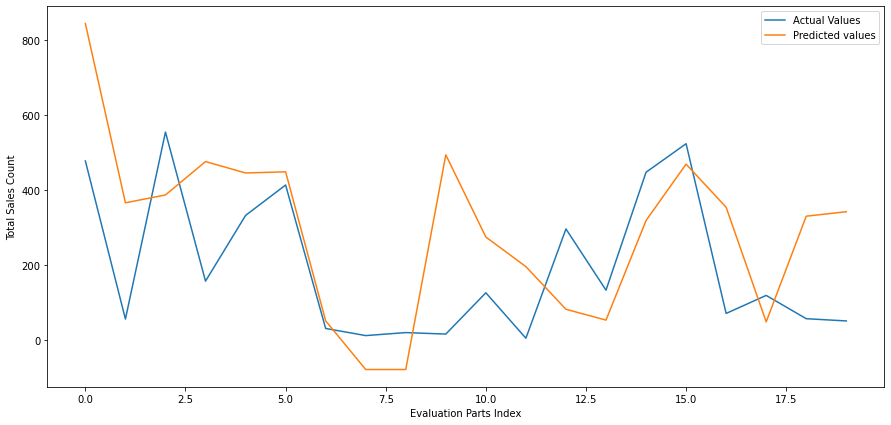

In [60]:
x1 = x[:20]
y1 = y[:20]
f = plt.figure(figsize=(15, 7))
plt.plot(x1['index'], x1['Total Units Sold Sales count'], label = "Actual Values")
plt.plot(x1['index'], y1['Total Units Sold Sales count'], label = "Predicted values")
plt.legend(loc="upper right")
plt.xlabel("Evaluation Parts Index")
plt.ylabel("Total Sales Count")

In [61]:
a=pd.merge(x, y, left_index=True, right_index=True)
a.drop('index_x', inplace=True, axis=1)
a.drop('index_y', inplace=True, axis=1)
a.rename(columns={'Total Units Sold Sales count_x':'Actual',
                 'Total Units Sold Sales count_y':'Predicted'}, inplace=True)

In [62]:
a['Difference'] = a.apply(lambda x: (x['Predicted'] - x['Actual']), axis=1)

In [63]:
a

,Actual,Predicted,Difference
0,478.0,843.944386,365.944386
1,57.0,366.586587,309.586587
2,555.0,387.519771,-167.480229
3,158.0,476.436240,318.436240
4,333.0,446.084790,113.084790
...,...,...,...
5538,32.0,303.117865,271.117865
5539,878.0,579.384853,-298.615147
5540,80.0,447.733185,367.733185
5541,239.0,709.899977,470.899977


In [64]:
np.mean(a['Difference'])

21.29026973543872

Text(0, 0.5, 'Total Units Sold Sales count')

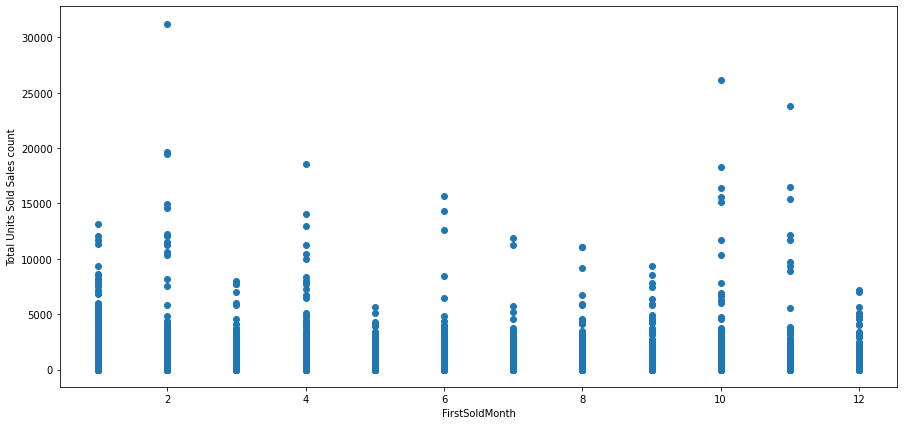

In [74]:
x = df[['FirstSoldMonth','Total Units Sold Sales count']]
f = plt.figure(figsize=(15, 7))
plt.scatter(x['FirstSoldMonth'],x['Total Units Sold Sales count'])
plt.xlabel("FirstSoldMonth")
plt.ylabel("Total Units Sold Sales count")